## Stage données L'équipe  -- TEST FILE

### Amaury Fournier

In [2]:
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join,getsize
import datetime
import csv
import pickle
import json
import smtplib
import pandas_profiling
import chardet
#path = "C:\Users\Data Science 5\Desktop\L_equipe"
path = "W:\L_equipe"
pd.set_option('display.max_columns', None)

In [6]:
#df = pd.read_pickle(path+'\dataframes\s_dataframe_general_xiti_pages_juin2015_partie2.pkl')
df = pd.read_csv(r"V:\Tables_Sas\L_Equipe\Projet_01042016\tables_brutes\Sessions\sessions_xiti-20151215-_Sessions_EQ_20151215.csv", sep=';')
#df_bas = pd.read_pickle(path+"\s_dataframe_general_xiti_clients.pkl")

In [3]:
df = pd.read_pickle(path+"\dataframes\s_dataframe_temp_session.pkl")

EOFError: 

In [39]:
now = datetime.datetime.now()
now = datetime.datetime(2015,4,15,23,10)
#if now.hour >= 1 and now.hour <5 : print 'yes'
#if now.hour> 14 : print 'maybe'
#if now.hour> 13 : print 'no'
if now.hour < 0 : print "yes"
print now.time()


23:10:00


### Session

In [43]:
name = "s_dataframe_pages_juin2015_partie2.pkl"
reg = re.match((".*_pages_(.*)\.pkl"), name)
print reg.group(1)

juin2015_partie2


In [ ]:
df.ServiceTitle = df.ServiceTitle.str.normalize("NFKD")
df.ServiceTitle = df.ServiceTitle.str.encode('ASCII','ignore')
df.loc[df.ServiceTitle.str.contains('Coca')]
#print len(df.ServiceTitle.value_counts(dropna=False))
#df.ServiceTitle.value_counts(dropna=False)

In [3]:
#affiche la totalité des colonnes du dataframe
pd.set_option('display.max_columns', None)

#retourne la liste des csv du répertoire Y:\L_Equipe\tablesbrutes\root\namedir
def makelistcsv(namedir, root):
    path = r'Y:\L_Equipe\tablesbrutes' + "\\" + root +"\\"+ namedir 
    if root == "Ventes en ligne":
        onlyfiles = [join(path,f) for f in listdir(path) if isfile(join(path, f)) if f.endswith('.csv') if f.startswith('EQP') if getsize(join(path,f))>0]
    else :
        onlyfiles = [join(path,f) for f in listdir(path) if isfile(join(path, f)) if f.endswith('.csv') if getsize(join(path,f))>0]
    return onlyfiles

#construit le dataframe du csv
def makedataframe(csv):
    if 'Ventes en ligne' in csv :
        df = pd.read_csv(csv, encoding = 'utf-16')
    else :
        df = pd.read_csv(csv, sep=';')
    return df

#retourne la liste privée des doublons de la liste seq 
def makeunique(seq):
    set = {}
    map(set.__setitem__, seq, [])
    return set.keys()

#retourne le dataframe général du repertoire directory
#directory :{client, session, page, compte, commande, souscription}
#/!\ attention à la ram 
#une fois la fonction executée le dataframe est sauvegardée dans le fichier pickle r"W:\L_equipe\s_dataframe_general_root_directory.txt"
#pensez à reset le kernel.
def makegeneraldataframe(directory ):
        if directory == "client" : 
            i=0
        elif directory == "session" : 
            i=1
        elif directory == "page" :
            i=2
        elif directory == "compte" :
            i=3
        elif directory == "commande" :
            i=4
        elif directory == "souscription":
            i=5
        if i < 3 :
            outfile = r'W:\L_equipe\s_dataframe_xiti.txt'
            l_df= pickle.load(open(outfile, "rb"))
            dfs = []
            for j in l_df[i] : 
                dfs.append(makedataframe(j))
            df_g = pd.concat(dfs)
            df_g.to_pickle(r"W:\L_equipe\s_dataframe_general_xiti_"+directory+".pkl")
            #pickle.dump(df_g, open( r"W:\L_equipe\s_dataframe_general_xiti_"+directory+".txt", "wb" ))
            #json.dump(df_g, open( r"W:\L_equipe\s_dataframe_general_xiti_"+directory+".json", "wb" ))
        elif i>= 3 and i<6 :
            outfile = r'W:\L_equipe\s_dataframe_vel.txt'
            l_df= pickle.load(open(outfile, "rb"))
            dfs = []
            for j in l_df[i-3] : 
                dfs.append(makedataframe(j))
            df_g = pd.concat(dfs)
            df_g.to_pickle(r"W:\L_equipe\s_dataframe_general_vel_"+directory+".pkl")
            #pickle.dump(df_g,  open( r"W:\L_equipe\s_dataframe_general_vel_"+directory+".txt", "wb" )) 
            #json.dump(df_g, open( r"W:\L_equipe\s_dataframe_general_vel_"+directory+".json", "wb" ))

        return df_g


## A faire tourner

In [8]:
df_g_page1 =  pd.read_csv(r"Y:\L_equipe\tablesbrutes\Xiti\Pages\pages_xiti-_pages_20150707.csv", sep=';')
df_g_page2 =  pd.read_csv(r"Y:\L_equipe\tablesbrutes\Xiti\Pages\pages_xiti-_pages_20150706.csv", sep=';')

In [9]:
df_g = pd.concat((df_g_page1,df_g_page2))

In [11]:
df_g.to_csv(r"W:\L_equipe\test_page.csv")

In [6]:
df_prod = pd.read_pickle(r"C:\Users\Data Science 5\Desktop\L_equipe\s_dataframe_general_vel_PROD42.pkl")
df_prod.sort_values(by='ExplicitPrice')

,SubscriptionId,ServiceID,SubscriptionCreated,SubscriptionLastUpdated,SubscriptionStatusID,SubscriptionStatus,ServiceTitle,ServiceDescription,ServiceGroup,ServiceGroupTitle,...,ClientUserId,ServiceExpiry,AutoRenew,ExplicitPaymentType,ExplicitPrice,ExplicitCurrency,PriceBandPaymentType,PriceBandAmount,PriceBandCurrency,IsTrial
2940,3919680,11829,05/12/2014 14:48:27,05/03/2015 14:49:10,3,Expired Subscription,Abo_ASO_3_mois_gratuits,Abonnement 3 mois gratuits via ASO Marathon,Abo EQP via Tiers,Abo EQP via Tiers,...,1407543,05/03/2015 14:48:27,0,eWallet,0,EUR,NaN,NaN,NaN,False
744,3963224,11787,10/01/2015 21:21:31,10/04/2015 21:25:30,2,Active Subscription,SFR_Full_Gratuit,Abonnement L'Équipe via SFR : full pris en opt...,Abo EQP via Tiers,Abo EQP via Tiers,...,1436049,10/05/2015 21:25:30,1,eWallet,0,EUR,NaN,NaN,NaN,False
745,3924245,11787,10/12/2014 21:27:06,10/04/2015 21:31:38,2,Active Subscription,SFR_Full_Gratuit,Abonnement L'Équipe via SFR : full pris en opt...,Abo EQP via Tiers,Abo EQP via Tiers,...,1411618,10/05/2015 21:31:38,1,eWallet,0,EUR,NaN,NaN,NaN,False
746,4047093,11787,10/02/2015 21:29:36,10/04/2015 21:31:40,2,Active Subscription,SFR_Full_Gratuit,Abonnement L'Équipe via SFR : full pris en opt...,Abo EQP via Tiers,Abo EQP via Tiers,...,1459689,10/05/2015 21:31:40,1,eWallet,0,EUR,NaN,NaN,NaN,False
747,4047094,11787,10/02/2015 21:30:33,10/04/2015 21:32:41,2,Active Subscription,SFR_Full_Gratuit,Abonnement L'Équipe via SFR : full pris en opt...,Abo EQP via Tiers,Abo EQP via Tiers,...,1459690,10/05/2015 21:32:41,1,eWallet,0,EUR,NaN,NaN,NaN,False
748,4047095,11787,10/02/2015 21:30:36,10/04/2015 21:32:42,2,Active Subscription,SFR_Full_Gratuit,Abonnement L'Équipe via SFR : full pris en opt...,Abo EQP via Tiers,Abo EQP via Tiers,...,1459691,10/05/2015 21:32:42,1,eWallet,0,EUR,NaN,NaN,NaN,False
749,4047097,11787,10/02/2015 21:32:12,10/04/2015 21:33:46,2,Active Subscription,SFR_Full_Gratuit,Abonnement L'Équipe via SFR : full pris en opt...,Abo EQP via Tiers,Abo EQP via Tiers,...,1459692,10/05/2015 21:33:46,1,eWallet,0,EUR,NaN,NaN,NaN,False
750,3924248,11787,10/12/2014 21:35:46,10/04/2015 21:39:08,2,Active Subscription,SFR_Full_Gratuit,Abonnement L'Équipe via SFR : full pris en opt...,Abo EQP via Tiers,Abo EQP via Tiers,...,1411629,10/05/2015 21:39:08,1,eWallet,0,EUR,NaN,NaN,NaN,False
751,4117010,11787,10/04/2015 21:49:39,10/04/2015 21:49:39,2,Active Subscription,SFR_Full_Gratuit,Abonnement L'Équipe via SFR : full pris en opt...,Abo EQP via Tiers,Abo EQP via Tiers,...,1502056,10/05/2015 21:49:39,1,eWallet,0,EUR,NaN,NaN,NaN,False
752,4117012,11787,10/04/2015 21:51:19,10/04/2015 21:51:19,2,Active Subscription,SFR_Full_Gratuit,Abonnement L'Équipe via SFR : full pris en opt...,Abo EQP via Tiers,Abo EQP via Tiers,...,1502058,10/05/2015 21:51:19,1,eWallet,0,EUR,NaN,NaN,NaN,False


In [13]:
#df_prod['SubscriptionCreated'] = pd.to_datetime(df_prod['SubscriptionCreated'], format='%d/%m/%Y %H:%M:%S')
df_prod['derniere_visite'] = pd.to_datetime(df_prod['derniere_visite'])

In [14]:
df_prod.head(6)

,fileid,id_site,id_client,premiere_visite,derniere_visite,visites,pages_vues
0,_clients_20130909_20140910.csv,413580,22833,2014-09-09,2014-09-09,1,1
1,_clients_20130909_20140910.csv,413580,94402,2014-08-03,2014-09-09,1,23
2,_clients_20130909_20140910.csv,413580,132365,2014-07-31,2014-09-09,2,3
3,_clients_20130909_20140910.csv,413580,643365,2014-08-08,2014-09-09,1,1
4,_clients_20130909_20140910.csv,413580,705303,2014-08-31,2014-09-09,8,30
5,_clients_20130909_20140910.csv,413580,715929,2014-08-04,2014-09-09,1,1


In [6]:
l =[1,2,3,4,5]
l2 = [1,6,9]
l3 = [1,6]
l4 = l2
print cmp(l,l2)
print cmp(l2,l)
print cmp(l2,l3)
print cmp(l2,l4)

-1
1
1
0


In [ ]:
df = pd.read_csv(r'V:\Tables_Sas\L_Equipe\Projet_01042016\tables_brutes\clients_premium_2015')
clients_premium_2015

In [2]:
df = pd.read_csv(r'V:\L_Equipe\Projet_01042016\tables_brutes\clients_premium_2015.csv')

In [3]:
d = df.id_client.unique()

In [6]:
data = pd.DataFrame(d)

In [21]:
data.rename(columns={0:'id_client'}, inplace=True)

In [26]:
data.to_csv(r'V:\L_Equipe\Projet_01042016\tables_brutes\liste_clients_premium_2015.csv', encoding ='utf-8', index=False, index_label=False)

### Exercices pour la formation python

In [64]:
#pseudo-code quicksort(liste)
#si taille de la liste inférieure ou égale à 1 :
#retourner liste
#sinon 
#pivot = un element de la liste 
#généralement on prend le premier ou le dernier elem
#retirer le pivot de la liste
#initialiser deux nouvelles listes (l_plus_grand et l_plus_petit)
#pour tout les elements restant :
#si element <= pivot le mettre dans la liste l_plus_petit
#sinon le mettre dans la liste l_plus_grand
#retourner concaténation(quicksort(l_plus_petit),pivot,l_plus_grand)



def quicksort(l) :
    if len(l) <=1 :
        return l
    else :
        pivot = l[-1]
        l.pop()
        lg=[]
        ll=[]
        for i in l :
            if i <= pivot :
                ll.append(i)
            else :
                lg.append(i)
    return quicksort(ll)+[pivot]+quicksort(lg)

l=[9,4,7,5,3,2,45,6,56,4,545,45,651,3,2,4,2,1]
l1 = quicksort(l)
l2 = (np.random.rand(10)*100).tolist()
l3= quicksort(l2)
print l3
print l1
        

[7.736088809308317, 13.81483987124924, 13.950135992962675, 19.48235271631029, 27.92005113490995, 34.09689261009342, 38.68282026282904, 40.499973831625816, 52.076174025053454, 92.35723624883387]
[1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 6, 7, 9, 45, 45, 56, 545, 651]


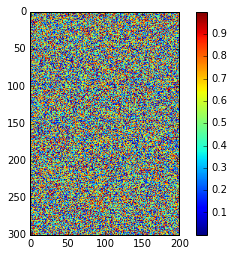

In [69]:
%matplotlib inline

C = np.random.rand(300,200)
plt.figure()
plt.imshow(C)
plt.colorbar()
plt.show()